## MO2

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Gpp = pd.read_csv('/content/drive/Shareddrives/DATA298B/Landsat_Data/Missouri/Data_Mis_BAU/LandSat_Gpp.csv')
ndvi = pd.read_csv('/content/drive/Shareddrives/DATA298B/Landsat_Data/Missouri/Data_Mis_BAU/LandSat_NDVI.csv')
Nppy = pd.read_csv('/content/drive/Shareddrives/DATA298B/Landsat_Data/Missouri/Data_Mis_BAU/LandSat_Nppy.csv')

In [4]:
Gpp.shape

(94185, 6)

In [5]:
Gpp.head()

,system:index,Date,GPP,latitude,longitude,.geo
0,0,2.015010e+11,NaN,39.229653,-92.152191,"{""type"":""Point"",""coordinates"":[-92.15219120118..."
1,1,2.015012e+11,NaN,39.229653,-92.152191,"{""type"":""Point"",""coordinates"":[-92.15219120118..."
2,2,2.015020e+11,NaN,39.229653,-92.152191,"{""type"":""Point"",""coordinates"":[-92.15219120118..."
3,3,2.015022e+11,NaN,39.229653,-92.152191,"{""type"":""Point"",""coordinates"":[-92.15219120118..."
4,4,2.015031e+11,NaN,39.229653,-92.152191,"{""type"":""Point"",""coordinates"":[-92.15219120118..."


In [6]:
Gpp.isna().sum()

,0
system:index,0
Date,0
GPP,3220
latitude,0
longitude,0
.geo,0


In [7]:
Gpp.dropna(inplace=True)

In [8]:
Gpp.drop(columns=['system:index'], inplace=True)
Gpp['GPP'] = Gpp['GPP'] * 0.0001
Gpp['Date'] = Gpp['Date'].astype(str)
Gpp['Date'] = Gpp['Date'].str[:8]
Gpp['Date'] = Gpp['Date'].apply(lambda x: x[:-2] + '01' if x.endswith('00') else x)
Gpp['Date'] = pd.to_datetime(Gpp['Date'], format='%Y%m%d', errors='coerce')
Gpp.head()

,Date,GPP,latitude,longitude,.geo
322,2015-01-01,0.0019,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201..."
323,2015-01-16,0.0110,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201..."
324,2015-02-01,0.0058,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201..."
325,2015-02-17,0.0009,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201..."
326,2015-03-06,0.0296,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201..."


In [9]:
Gpp['Year'] = Gpp['Date'].dt.year

In [10]:
Gpp.head()

,Date,GPP,latitude,longitude,.geo,Year
322,2015-01-01,0.0019,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",2015
323,2015-01-16,0.0110,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",2015
324,2015-02-01,0.0058,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",2015
325,2015-02-17,0.0009,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",2015
326,2015-03-06,0.0296,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",2015


In [11]:
Gppy = pd.DataFrame(Gpp.groupby(['Year','latitude','longitude'])['GPP'].sum()).reset_index()

In [12]:
Gppy.head()

,Year,latitude,longitude,GPP
0,2015,39.229653,-92.151652,2.2009
1,2015,39.229653,-92.151383,2.0944
2,2015,39.229653,-92.151113,1.9686
3,2015,39.229653,-92.150844,1.8577
4,2015,39.229653,-92.150574,1.8161


In [13]:
Gppy.rename(columns={'GPP': 'Gppy'}, inplace=True)

In [14]:
Gppy.shape

(3958, 4)

In [15]:
Gpp_merged = pd.merge(Gpp, Gppy, on=['Year', 'latitude','longitude'], how='inner')
Gpp_merged.head()

,Date,GPP,latitude,longitude,.geo,Year,Gppy
0,2015-01-01,0.0019,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",2015,2.2009
1,2015-01-16,0.0110,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",2015,2.2009
2,2015-02-01,0.0058,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",2015,2.2009
3,2015-02-17,0.0009,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",2015,2.2009
4,2015-03-06,0.0296,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",2015,2.2009


In [16]:
Gpp_merged.shape

(90965, 7)

In [17]:
Gpp_merged.drop(columns=['Year'],inplace=True)

In [18]:
Gpp_merged.head()

,Date,GPP,latitude,longitude,.geo,Gppy
0,2015-01-01,0.0019,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",2.2009
1,2015-01-16,0.0110,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",2.2009
2,2015-02-01,0.0058,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",2.2009
3,2015-02-17,0.0009,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",2.2009
4,2015-03-06,0.0296,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",2.2009


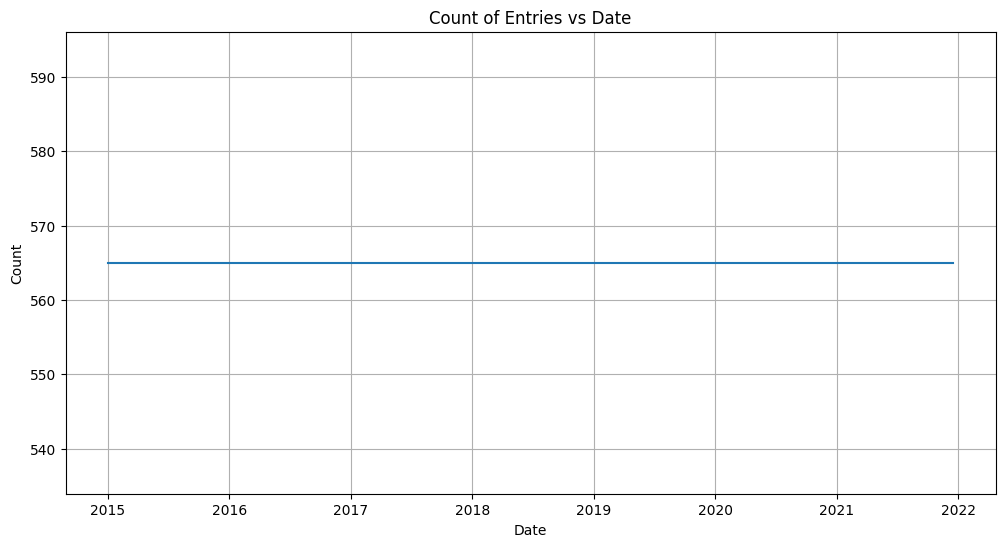

In [19]:
# Group by date and count the number of entries
date_counts = Gpp_merged.groupby('Date').size()

# Plotting the counts vs date
plt.figure(figsize=(12, 6))
plt.plot(date_counts.index, date_counts.values)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Entries vs Date')
plt.grid(True)
plt.show()


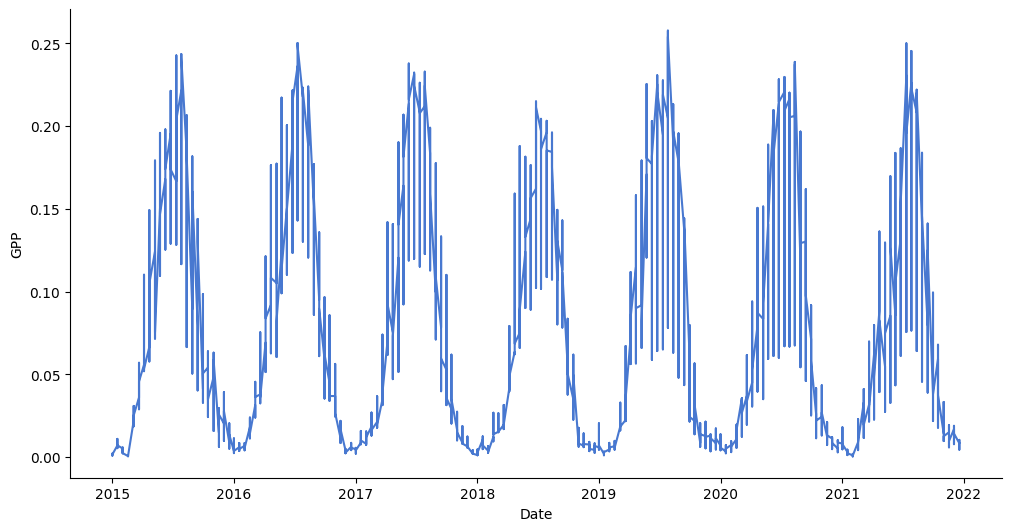

In [21]:
# @title Date vs GPP

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = sns.color_palette('muted')
  xs = series['Date']
  ys = series['GPP']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Gpp_merged.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('GPP')

In [22]:
unique_date_lat_lon = Gpp_merged[['latitude', 'longitude']].drop_duplicates()
print(unique_date_lat_lon)

        latitude  longitude
0      39.229653 -92.151652
161    39.229653 -92.151383
322    39.229653 -92.151113
483    39.229653 -92.150844
644    39.229653 -92.150574
...          ...        ...
90160  39.233695 -92.143837
90321  39.233695 -92.143567
90482  39.233695 -92.143298
90643  39.233695 -92.143028
90804  39.233695 -92.142759

[568 rows x 2 columns]


In [23]:
ndvi.head()

,system:index,Date,NDVI,latitude,longitude,.geo
0,0,2.015010e+11,NaN,39.229653,-92.152191,"{""type"":""Point"",""coordinates"":[-92.15219120118..."
1,1,2.015011e+11,NaN,39.229653,-92.152191,"{""type"":""Point"",""coordinates"":[-92.15219120118..."
2,2,2.015012e+11,0.295213,39.229653,-92.152191,"{""type"":""Point"",""coordinates"":[-92.15219120118..."
3,3,2.015012e+11,0.391841,39.229653,-92.152191,"{""type"":""Point"",""coordinates"":[-92.15219120118..."
4,4,2.015020e+11,NaN,39.229653,-92.152191,"{""type"":""Point"",""coordinates"":[-92.15219120118..."


In [24]:
ndvi.shape

(188370, 6)

In [25]:
ndvi.isna().sum()

,0
system:index,0
Date,0
NDVI,138907
latitude,0
longitude,0
.geo,0


In [26]:
ndvi.dropna(inplace=True)

In [27]:
ndvi.drop(columns=['system:index'], inplace=True)
ndvi['NDVI'] = ndvi['NDVI']
ndvi['Date'] = ndvi['Date'].astype(str)
ndvi['Date'] = ndvi['Date'].str[:8]
ndvi['Date'] = ndvi['Date'].apply(lambda x: x[:-2] + '01' if x.endswith('00') else x)
ndvi['Date'] = pd.to_datetime(ndvi['Date'], format='%Y%m%d', errors='coerce')
ndvi.head()

,Date,NDVI,latitude,longitude,.geo
2,2015-01-16,0.295213,39.229653,-92.152191,"{""type"":""Point"",""coordinates"":[-92.15219120118..."
3,2015-01-24,0.391841,39.229653,-92.152191,"{""type"":""Point"",""coordinates"":[-92.15219120118..."
8,2015-03-06,0.238384,39.229653,-92.152191,"{""type"":""Point"",""coordinates"":[-92.15219120118..."
9,2015-03-14,0.365853,39.229653,-92.152191,"{""type"":""Point"",""coordinates"":[-92.15219120118..."
15,2015-05-01,0.708003,39.229653,-92.152191,"{""type"":""Point"",""coordinates"":[-92.15219120118..."


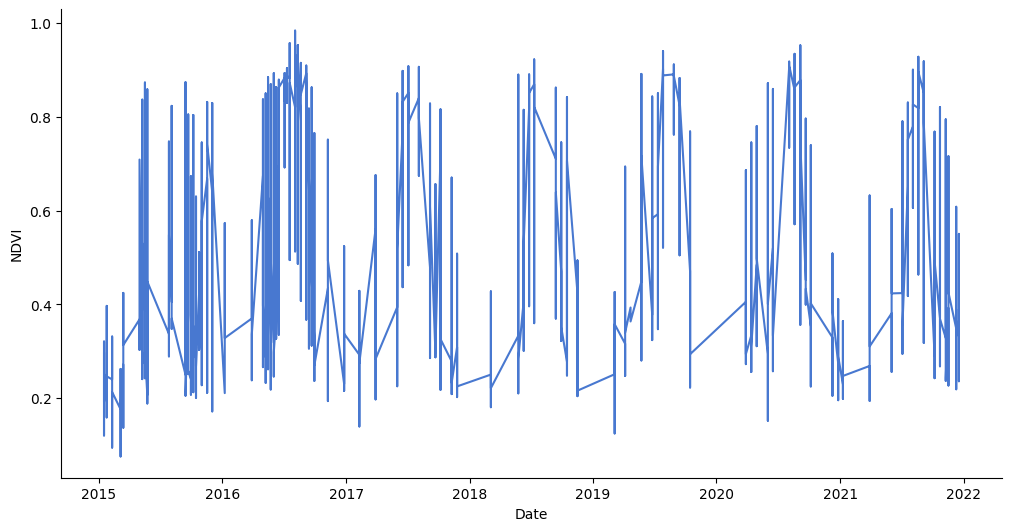

In [28]:
# @title Date vs NDVI

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = sns.color_palette('muted')
  xs = series['Date']
  ys = series['NDVI']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = ndvi.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('NDVI')

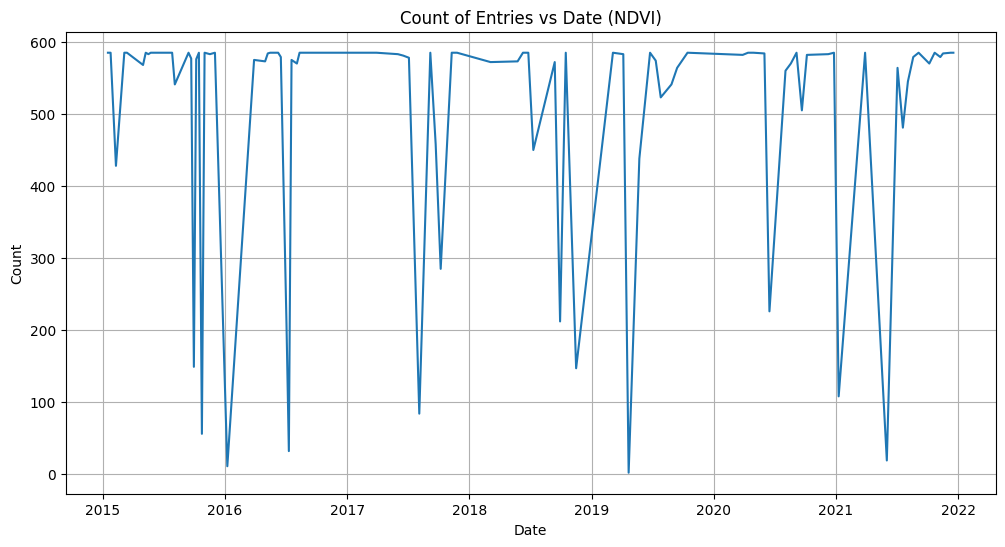

In [29]:
# Group by date and count the number of entries
date_counts_ndvi = ndvi.groupby('Date').size()

# Plotting the counts vs date
plt.figure(figsize=(12, 6))
plt.plot(date_counts_ndvi.index, date_counts_ndvi.values)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Entries vs Date (NDVI)')
plt.grid(True)
plt.show()


In [30]:
ndvi.drop(columns=['.geo'],inplace=True)

In [31]:
#merge Gpp and NDVI on Date, latitude and longitude

merged_df = pd.merge(Gpp_merged, ndvi, on=['Date', 'latitude', 'longitude'], how='inner')
merged_df.head()

,Date,GPP,latitude,longitude,.geo,Gppy,NDVI
0,2015-01-16,0.0110,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",2.2009,0.295213
1,2015-03-06,0.0296,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",2.2009,0.225438
2,2015-05-09,0.1714,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",2.2009,0.834532
3,2015-05-24,0.1941,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",2.2009,0.828204
4,2015-07-27,0.1842,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",2.2009,0.682737


In [32]:
merged_df.shape

(19294, 7)

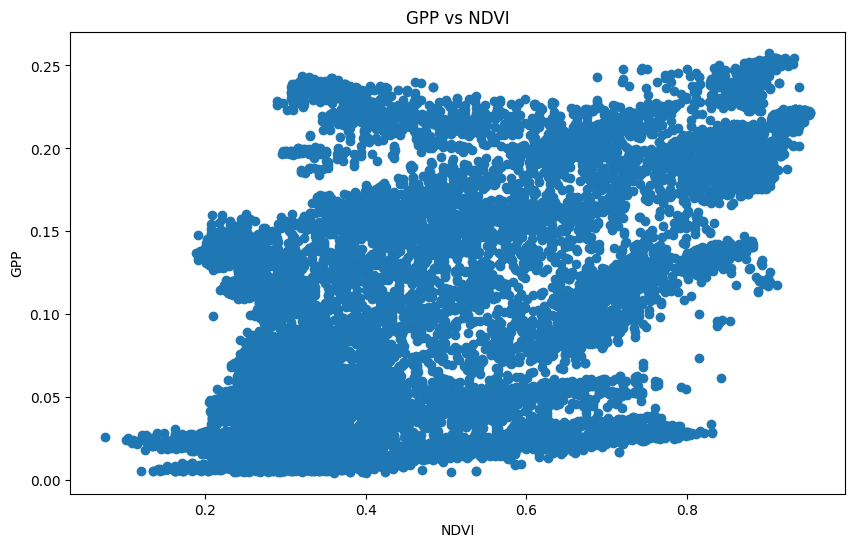

In [33]:
# @title GPP vs NDVI

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['NDVI'], merged_df['GPP'])
plt.xlabel('NDVI')
plt.ylabel('GPP')
_ = plt.title('GPP vs NDVI')


In [34]:
Nppy.shape

(3510, 6)

In [35]:
Nppy.isna().sum()

,0
system:index,0
Date,0
NPPy,120
latitude,0
longitude,0
.geo,0


In [36]:
Nppy.dropna(inplace=True)

In [37]:
Nppy.head()

,system:index,Date,NPPy,latitude,longitude,.geo
12,12,2.015010e+11,12083.0,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201..."
13,13,2.016010e+11,12198.0,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201..."
14,14,2.017010e+11,12609.0,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201..."
15,15,2.018010e+11,9881.0,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201..."
16,16,2.019010e+11,9330.0,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201..."


In [38]:
Nppy.drop(columns=['system:index'], inplace=True)
Nppy['NPPy'] = Nppy['NPPy']*0.0001
Nppy['Date'] = Nppy['Date'].astype(str)
Nppy['Date'] = Nppy['Date'].str[:8]
Nppy['Date'] = Nppy['Date'].apply(lambda x: x[:-2] + '01' if x.endswith('00') else x)
Nppy['Date'] = pd.to_datetime(Nppy['Date'], format='%Y%m%d', errors='coerce')
Nppy.head()

,Date,NPPy,latitude,longitude,.geo
12,2015-01-01,1.2083,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201..."
13,2016-01-01,1.2198,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201..."
14,2017-01-01,1.2609,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201..."
15,2018-01-01,0.9881,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201..."
16,2019-01-01,0.9330,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201..."


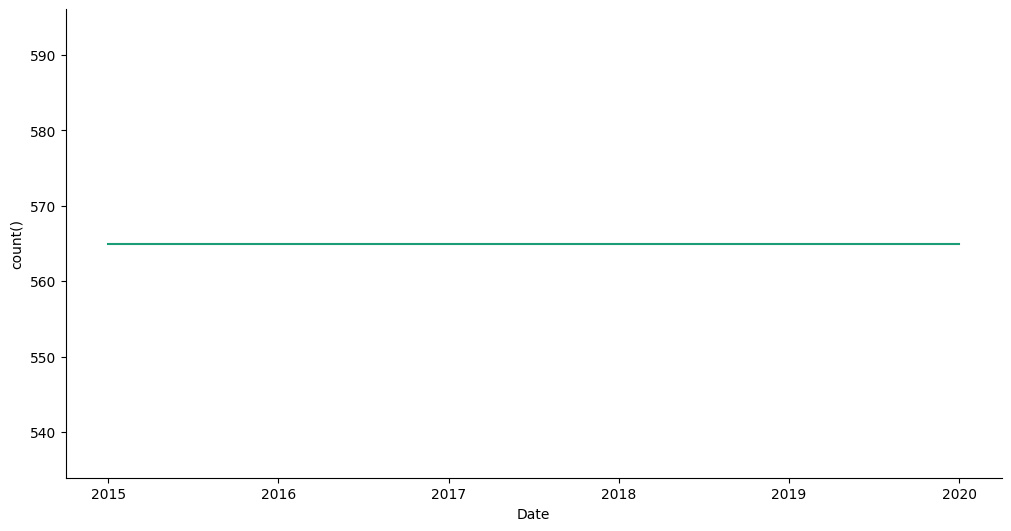

In [39]:
# @title Date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Nppy.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

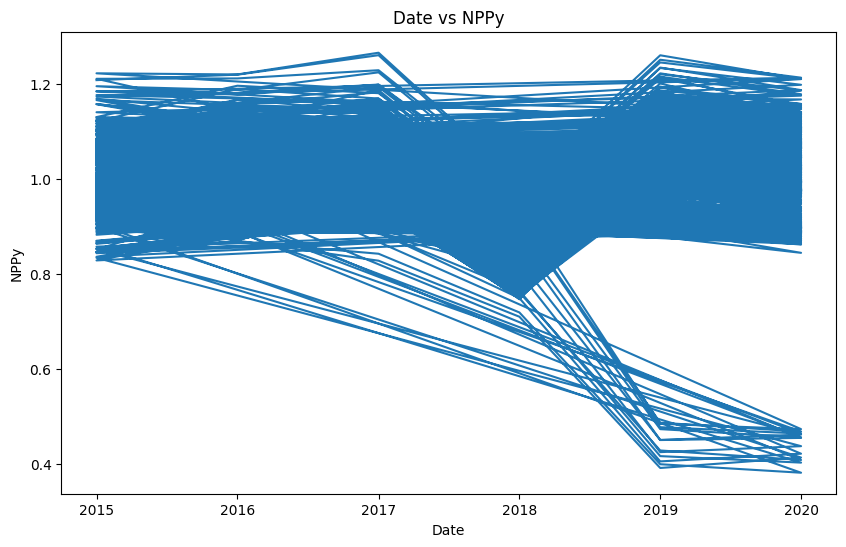

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(Nppy['Date'], Nppy['NPPy'])
plt.xlabel('Date')
plt.ylabel('NPPy')
plt.title('Date vs NPPy')
plt.show()

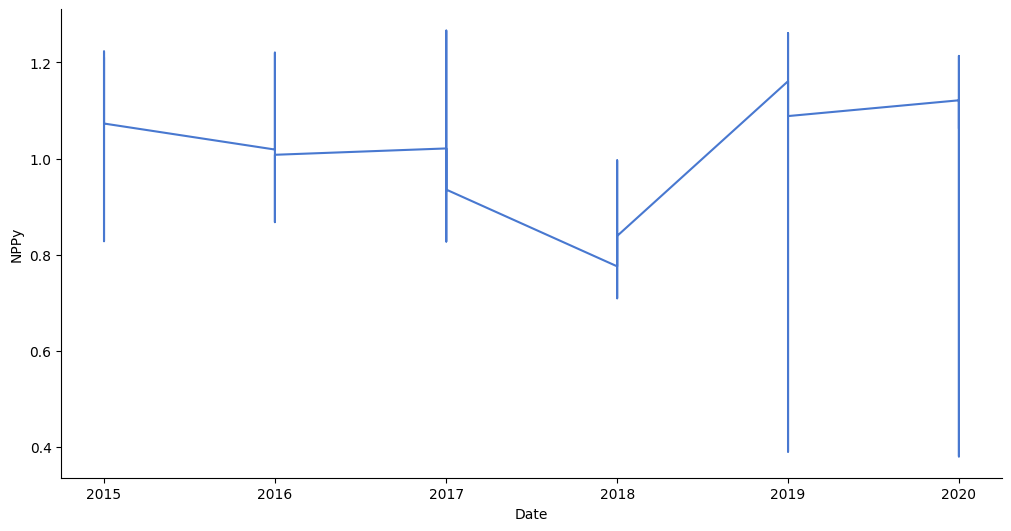

In [42]:
# @title Date vs NPPy

def _plot_series(series, series_name, series_index=0):
  palette = sns.color_palette('muted')
  xs = series['Date']
  ys = series['NPPy']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Nppy.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('NPPy')


In [ ]:
Nppy.drop(columns=['.geo'], inplace=True)

In [ ]:
# Extract year from the 'Date' column and create a new 'year' column
Nppy['year'] = Nppy['Date'].dt.year


In [ ]:
Nppy.head()

,Date,NPPy,latitude,longitude,year
12,2015-01-01,1.2083,39.229653,-92.151652,2015
13,2016-01-01,1.2198,39.229653,-92.151652,2016
14,2017-01-01,1.2609,39.229653,-92.151652,2017
15,2018-01-01,0.9881,39.229653,-92.151652,2018
16,2019-01-01,0.9330,39.229653,-92.151652,2019


In [ ]:
Nppy.drop(columns=['Date'], inplace=True)

In [ ]:
merged_df['year'] = merged_df['Date'].dt.year
merged_df.head()

,Date,GPP,latitude,longitude,.geo,Gppy,NDVI,year
0,2015-01-16,0.0110,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",2.2009,0.295213,2015
1,2015-03-06,0.0296,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",2.2009,0.225438,2015
2,2015-05-09,0.1714,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",2.2009,0.834532,2015
3,2015-05-24,0.1941,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",2.2009,0.828204,2015
4,2015-07-27,0.1842,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",2.2009,0.682737,2015


In [ ]:
merged_data = pd.merge(merged_df, Nppy, on=['year', 'latitude', 'longitude'], how='inner')
merged_data.head()

,Date,GPP,latitude,longitude,.geo,Gppy,NDVI,year,NPPy
0,2015-01-16,0.0110,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",2.2009,0.295213,2015,1.2083
1,2015-03-06,0.0296,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",2.2009,0.225438,2015,1.2083
2,2015-05-09,0.1714,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",2.2009,0.834532,2015,1.2083
3,2015-05-24,0.1941,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",2.2009,0.828204,2015,1.2083
4,2015-07-27,0.1842,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",2.2009,0.682737,2015,1.2083


In [ ]:
# Rearrange the columns in the desired order
new_column_order = ['Date', 'latitude', 'longitude', '.geo', 'GPP', 'NDVI', 'Gppy', 'NPPy']
merged_data = merged_data[new_column_order]

In [ ]:
merged_data.head()

,Date,latitude,longitude,.geo,GPP,NDVI,Gppy,NPPy
0,2015-01-16,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",0.0110,0.295213,2.2009,1.2083
1,2015-03-06,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",0.0296,0.225438,2.2009,1.2083
2,2015-05-09,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",0.1714,0.834532,2.2009,1.2083
3,2015-05-24,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",0.1941,0.828204,2.2009,1.2083
4,2015-07-27,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",0.1842,0.682737,2.2009,1.2083


In [ ]:
merged_data.shape

(18156, 8)

In [ ]:
merged_data.isna().sum()

,0
Date,0
latitude,0
longitude,0
.geo,0
GPP,0
NDVI,0
Gppy,0
NPPy,0


In [ ]:
merged_data.head()

,Date,latitude,longitude,.geo,GPP,NDVI,Gppy,NPPy
0,2015-01-16,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",0.0110,0.295213,2.2009,1.2083
1,2015-03-06,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",0.0296,0.225438,2.2009,1.2083
2,2015-05-09,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",0.1714,0.834532,2.2009,1.2083
3,2015-05-24,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",0.1941,0.828204,2.2009,1.2083
4,2015-07-27,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",0.1842,0.682737,2.2009,1.2083


In [ ]:
merged_data['Npp'] = (merged_data['GPP'] / merged_data['Gppy']) * merged_data['NPPy']

In [ ]:
merged_data.head()

,Date,latitude,longitude,.geo,GPP,NDVI,Gppy,NPPy,Npp
0,2015-01-16,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",0.0110,0.295213,2.2009,1.2083,0.006039
1,2015-03-06,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",0.0296,0.225438,2.2009,1.2083,0.016250
2,2015-05-09,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",0.1714,0.834532,2.2009,1.2083,0.094099
3,2015-05-24,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",0.1941,0.828204,2.2009,1.2083,0.106561
4,2015-07-27,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",0.1842,0.682737,2.2009,1.2083,0.101126


In [ ]:
merged_data.isna().sum()

,0
Date,0
latitude,0
longitude,0
.geo,0
GPP,0
NDVI,0
Gppy,0
NPPy,0
Npp,0


In [ ]:
merged_data.shape

(18156, 9)

In [ ]:
# Export the dataframe to a CSV file
merged_data.to_csv('/content/drive/Shareddrives/DATA298B/Landsat_Data/Missouri/Data_Mis_BAU/Missouri_BAU_satellite_data.csv', index=False)


# Weather data from Flux towers

In [ ]:
arm_data = pd.read_csv('/content/drive/Shareddrives/DATA298B/Ameriflux data/Missouri/US-Mo3.csv', skiprows=2)
arm_data

,TIMESTAMP_START,TIMESTAMP_END,FC_1_1_1,H_1_1_1,H_PI_F_1_1_1,LE_1_1_1,LE_PI_F_1_1_1,NEE_PI,NEE_PI_F,GPP_PI_F,...,TS_2_1_1,TS_3_1_1,G_1_1_1,G_2_1_1,G_3_1_1,G_4_1_1,SG_1_1_1,SG_2_1_1,SWC_1_1_1,TA_PI_F_1_1_1
0,201601010000,201601010030,-9999.00000,-9999.0000,-9999.0000,-9999.000,-9999.000,-9999.00000,-9999.00000,-9999.00000,...,-9999.000000,-9999.000000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.00000
1,201601010030,201601010100,-9999.00000,-9999.0000,-9999.0000,-9999.000,-9999.000,-9999.00000,-9999.00000,-9999.00000,...,-9999.000000,-9999.000000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.00000
2,201601010100,201601010130,-9999.00000,-9999.0000,-9999.0000,-9999.000,-9999.000,-9999.00000,-9999.00000,-9999.00000,...,-9999.000000,-9999.000000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.00000
3,201601010130,201601010200,-9999.00000,-9999.0000,-9999.0000,-9999.000,-9999.000,-9999.00000,-9999.00000,-9999.00000,...,-9999.000000,-9999.000000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.00000
4,201601010200,201601010230,-9999.00000,-9999.0000,-9999.0000,-9999.000,-9999.000,-9999.00000,-9999.00000,-9999.00000,...,-9999.000000,-9999.000000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140250,202312312100,202312312130,0.53487,-4.2820,-4.2820,10.596,10.596,0.53487,0.53487,0.34108,...,1.393728,2.971498,-18.83181,-19.95082,-12.15191,-15.71237,-1.607061,-1.904655,39.27000,-0.10103
140251,202312312130,202312312200,0.65769,-3.9630,-3.9630,10.701,10.701,0.65769,0.65769,0.21269,...,1.371344,2.943683,-18.85350,-19.73719,-12.16810,-15.66050,-1.545322,-1.516830,39.27000,-0.18477
140252,202312312200,202312312230,0.63640,-3.7109,-3.7109,11.166,11.166,0.63640,0.63640,0.22784,...,1.350121,2.914902,-18.75310,-19.51611,-12.20928,-15.58196,-1.136436,-1.437857,39.27000,-0.27744
140253,202312312230,202312312300,0.50568,-3.4695,-3.4695,10.369,10.369,0.50568,0.50568,0.35381,...,1.331466,2.888248,-18.70956,-19.36474,-12.25780,-15.51571,-1.477872,-1.263151,39.23011,-0.34930


In [ ]:
arm_data=arm_data.drop('TIMESTAMP_START',axis=1)

arm_data=arm_data.rename(columns={'TIMESTAMP_END': 'TIMESTAMP'})
arm_data['TIMESTAMP'] = pd.to_datetime(arm_data['TIMESTAMP'], format='%Y%m%d%H%M')
arm_data = arm_data[(arm_data['TIMESTAMP'].dt.year >= 2015) & (arm_data['TIMESTAMP'].dt.year <= 2021)]
arm_data['TIMESTAMP'] = pd.to_datetime(arm_data['TIMESTAMP'])
arm_data['TIMESTAMP'] = arm_data['TIMESTAMP'].dt.date
data = arm_data

<ipython-input-58-2cc50464675b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arm_data['TIMESTAMP'] = pd.to_datetime(arm_data['TIMESTAMP'])
<ipython-input-58-2cc50464675b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arm_data['TIMESTAMP'] = arm_data['TIMESTAMP'].dt.date


In [ ]:
# Define the column range to check (excluding the Date column)
cols_to_check = data.columns[2:]  # This excludes the Date column

# Use apply with a lambda function to check if all values from Col1 to Col149 are -9999.0
rows_to_keep = data[cols_to_check].apply(lambda row: not (row == -9999.0).all(), axis=1)

# Filter the DataFrame to retain rows where not all values are -9999.0
data= data[rows_to_keep]
data

,TIMESTAMP,FC_1_1_1,H_1_1_1,H_PI_F_1_1_1,LE_1_1_1,LE_PI_F_1_1_1,NEE_PI,NEE_PI_F,GPP_PI_F,RECO_PI,...,TS_2_1_1,TS_3_1_1,G_1_1_1,G_2_1_1,G_3_1_1,G_4_1_1,SG_1_1_1,SG_2_1_1,SWC_1_1_1,TA_PI_F_1_1_1
7296,2016-06-01,0.80598,0.86963,0.86963,-9999.0000,9.5933,-9999.00000,2.76480,0.005436,2.770238,...,21.827350,23.505100,-28.53646,-24.90220,-25.15178,-21.26160,-10.656132,-11.837565,36.42497,19.2760
7297,2016-06-01,1.64040,1.25410,1.25410,-9999.0000,9.0292,-9999.00000,2.85590,-0.102520,2.753402,...,21.684490,23.275170,-26.81488,-23.53395,-23.61399,-20.00368,-8.337469,-9.488356,36.43014,19.1140
7298,2016-06-01,2.12840,3.17630,3.17630,-9999.0000,9.3396,-9999.00000,2.82890,-0.077466,2.751471,...,21.542610,23.073610,-25.79815,-22.66566,-22.56640,-19.06809,-8.757917,-9.412097,36.43219,19.0960
7299,2016-06-01,1.44220,0.39159,0.39159,-9999.0000,9.5408,-9999.00000,2.72510,0.011269,2.736409,...,21.404290,22.889820,-25.36552,-22.13287,-21.94061,-18.69970,-10.541306,-9.166054,36.43919,18.9510
7300,2016-06-01,0.90220,-0.39248,-0.39248,-9999.0000,9.5408,-9999.00000,2.72510,0.020864,2.746004,...,21.201590,22.722720,-26.17485,-22.63312,-22.56861,-18.98585,-14.166446,-13.420227,36.44019,19.0430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105210,2021-12-31,0.81374,6.95080,6.95080,11.4020,11.4020,0.81374,0.81374,0.216990,1.030736,...,5.775723,6.110316,-10.22340,-9999.00000,-12.51674,-14.59954,-7.453594,-11.400871,36.91886,4.4135
105211,2021-12-31,-0.48519,-14.64800,-14.64800,-9.3494,-9.3494,-0.48519,-0.48519,1.460200,0.975009,...,5.648905,5.999934,-10.54713,-9999.00000,-12.61707,-15.86017,-11.733061,-8.718890,36.87000,3.5382
105212,2021-12-31,0.55240,5.38840,5.38840,14.1920,14.1920,0.55240,0.55240,0.384080,0.936477,...,5.462496,5.897485,-12.88239,-9999.00000,-15.08324,-19.80467,-19.227468,-12.806257,36.87227,2.9199
105213,2021-12-31,0.36272,5.26460,5.26460,12.2510,12.2510,0.36272,0.36272,0.541190,0.903906,...,5.244099,5.793913,-14.77745,-9999.00000,-17.05552,-21.24833,-16.734503,-14.997779,36.87739,2.3886


In [ ]:
# Function to rename columns by replacing '_IN_' with 'IN' and '_OUT_' with 'OUT'
def rename_in_out_columns(col_name):
    if '_IN_' in col_name:
        return col_name.replace('_IN_', 'IN_')
    elif '_OUT_' in col_name:
        return col_name.replace('_OUT_', 'OUT_')
    else:
        return col_name

# Apply the function to all columns
data.columns = [rename_in_out_columns(col) for col in arm_data.columns]

# Display the first few rows to check the results
data.head()

,TIMESTAMP,FC_1_1_1,H_1_1_1,H_PI_F_1_1_1,LE_1_1_1,LE_PI_F_1_1_1,NEE_PI,NEE_PI_F,GPP_PI_F,RECO_PI,...,TS_2_1_1,TS_3_1_1,G_1_1_1,G_2_1_1,G_3_1_1,G_4_1_1,SG_1_1_1,SG_2_1_1,SWC_1_1_1,TA_PI_F_1_1_1
7296,2016-06-01,0.80598,0.86963,0.86963,-9999.0,9.5933,-9999.0,2.7648,0.005436,2.770238,...,21.82735,23.50510,-28.53646,-24.90220,-25.15178,-21.26160,-10.656132,-11.837565,36.42497,19.276
7297,2016-06-01,1.64040,1.25410,1.25410,-9999.0,9.0292,-9999.0,2.8559,-0.102520,2.753402,...,21.68449,23.27517,-26.81488,-23.53395,-23.61399,-20.00368,-8.337469,-9.488356,36.43014,19.114
7298,2016-06-01,2.12840,3.17630,3.17630,-9999.0,9.3396,-9999.0,2.8289,-0.077466,2.751471,...,21.54261,23.07361,-25.79815,-22.66566,-22.56640,-19.06809,-8.757917,-9.412097,36.43219,19.096
7299,2016-06-01,1.44220,0.39159,0.39159,-9999.0,9.5408,-9999.0,2.7251,0.011269,2.736409,...,21.40429,22.88982,-25.36552,-22.13287,-21.94061,-18.69970,-10.541306,-9.166054,36.43919,18.951
7300,2016-06-01,0.90220,-0.39248,-0.39248,-9999.0,9.5408,-9999.0,2.7251,0.020864,2.746004,...,21.20159,22.72272,-26.17485,-22.63312,-22.56861,-18.98585,-14.166446,-13.420227,36.44019,19.043


In [ ]:
# Replace -9999.0 with NaN
data.replace(-9999.0, np.nan, inplace=True)

# Count missing values (NaNs) in each column
missing_values_count = data.isnull().sum()

# Calculate percentage of missing values in each column
missing_values_percent = (missing_values_count / len(data)) * 100

# Drop columns where missing values exceed 50%
data = data.drop(columns=missing_values_percent[missing_values_percent > 40].index)

# Ensure pandas shows all columns
pd.set_option('display.max_columns', None)
data

<ipython-input-61-d87ba21fc32d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(-9999.0, np.nan, inplace=True)


,TIMESTAMP,FC_1_1_1,H_1_1_1,H_PI_F_1_1_1,LE_1_1_1,LE_PI_F_1_1_1,NEE_PI,NEE_PI_F,GPP_PI_F,RECO_PI,TAU_1_1_1,USTAR_1_1_1,CO2_1_1_1,CO2_MIXING_RATIO_1_1_1,H2O_1_1_1,H2O_MIXING_RATIO_1_1_1,H2O_SIGMA_1_1_1,CO2_SIGMA_1_1_1,WD_1_1_1,WS_1_1_1,U_SIGMA_1_1_1,V_SIGMA_1_1_1,W_SIGMA_1_1_1,PA_1_1_1,RH_1_1_1,VPD_PI_1_1_1,TA_1_1_1,P_1_1_1,PPFDIN_1_1_1,PPFDOUT_1_1_1,SWIN_1_1_1,SWOUT_1_1_1,LWIN_1_1_1,LWOUT_1_1_1,NETRAD_1_1_1,MO_LENGTH_1_1_1,T_SONIC_1_1_1,T_SONIC_SIGMA_1_1_1,TS_1_1_1,TS_2_1_1,TS_3_1_1,G_1_1_1,G_2_1_1,G_3_1_1,G_4_1_1,SG_1_1_1,SG_2_1_1,SWC_1_1_1,TA_PI_F_1_1_1
7296,2016-06-01,0.80598,0.86963,0.86963,NaN,9.5933,NaN,2.76480,0.005436,2.770238,-0.001952,0.041023,404.007323,413.036245,21.881155,22.370164,0.164777,1.185195,191.79630,0.458511,0.267522,0.218603,0.058656,98.17338,96.04530,0.883610,19.2760,0.0,0.006022,0.042955,0.0,1.862684,390.8939,418.5053,-30.490550,-4.581491,22.031100,0.074210,21.565510,21.827350,23.505100,-28.53646,-24.90220,-25.15178,-21.26160,-10.656132,-11.837565,36.42497,19.2760
7297,2016-06-01,1.64040,1.25410,1.25410,NaN,9.0292,NaN,2.85590,-0.102520,2.753402,-0.004297,0.060848,407.968166,417.075354,21.753924,22.239543,0.223240,4.585516,299.53700,0.653147,0.592214,0.281926,0.056563,98.16869,96.90507,0.684580,19.1140,0.0,0.003854,0.042716,0.0,1.553205,391.7001,417.9326,-28.880870,-10.537717,21.877050,0.201686,21.439980,21.684490,23.275170,-26.81488,-23.53395,-23.61399,-20.00368,-8.337469,-9.488356,36.43014,19.1140
7298,2016-06-01,2.12840,3.17630,3.17630,NaN,9.3396,NaN,2.82890,-0.077466,2.751471,-0.003108,0.051746,408.981605,418.090976,21.538060,22.017784,0.257716,2.871943,221.62160,0.857963,0.335284,0.325080,0.069068,98.14668,96.78166,0.711070,19.0960,0.0,0.018549,0.061568,0.0,1.478618,393.5391,417.6316,-26.717940,-2.965257,21.811910,0.182096,21.307960,21.542610,23.073610,-25.79815,-22.66566,-22.56640,-19.06809,-8.757917,-9.412097,36.43219,19.0960
7299,2016-06-01,1.44220,0.39159,0.39159,NaN,9.5408,NaN,2.72510,0.011269,2.736409,-0.000536,0.021479,411.506170,420.570325,21.251871,21.719982,0.197973,6.927633,240.86740,0.730421,0.296417,0.306885,0.060736,98.14090,96.60120,0.744160,18.9510,0.0,0.001445,0.049159,0.0,1.808694,382.2150,415.8705,-37.075730,-1.016593,21.703850,0.110115,21.148880,21.404290,22.889820,-25.36552,-22.13287,-21.94061,-18.69970,-10.541306,-9.166054,36.43919,18.9510
7300,2016-06-01,0.90220,-0.39248,-0.39248,NaN,9.5408,NaN,2.72510,0.020864,2.746004,-0.001359,0.034216,429.714280,439.156575,21.220176,21.686456,0.245219,4.080925,356.83510,0.532039,0.211719,0.359748,0.044680,98.14266,95.81989,0.920510,19.0430,0.0,0.002891,0.053931,0.0,2.048182,378.8013,414.6639,-39.313770,283.930964,21.824000,0.120340,20.934920,21.201590,22.722720,-26.17485,-22.63312,-22.56861,-18.98585,-14.166446,-13.420227,36.44019,19.0430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105210,2021-12-31,0.81374,6.95080,6.95080,11.4020,11.4020,0.81374,0.81374,0.216990,1.030736,-0.081727,0.259012,432.647509,436.367776,7.362577,7.425887,0.064896,0.204332,14.90164,3.300889,0.932672,0.850413,0.384038,97.35732,99.18001,0.068621,4.4135,0.0,0.058500,0.126871,0.0,-0.243917,328.8587,336.1203,-7.760906,-197.976885,6.989848,0.123160,5.510824,5.775723,6.110316,-10.22340,NaN,-12.51674,-14.59954,-7.453594,-11.400871,36.91886,4.4135
105211,2021-12-31,-0.48519,-14.64800,-14.64800,-9.3494,-9.3494,-0.48519,-0.48519,1.460200,0.975009,-0.145618,0.345095,431.540742,435.017479,6.881053,6.936491,0.176699,0.181976,20.17987,4.271572,1.249495,1.090631,0.485819,97.39130,98.90099,0.086491,3.5382,0.0,0.056093,0.115903,0.0,-0.418272,325.2090,332.9269,-8.233994,234.489771,5.978474,0.269878,5.340164,5.648905,5.999934,-10.54713,NaN,-12.61707,-15.86017,-11.733061,-8.718890,36.87000,3.5382
105212,2021-12-31,0.55240,5.38840,5.38840,14.1920,14.1920,0.55240,0.55240,0.384080,0.936477,-0.106331,0.294424,431.261388,434.551618,6.5

In [ ]:
fc_columns = [col for col in data.columns if 'FC' in col]
pi_columns = [col for col in data.columns if '_PI_F' in col]
data=data.drop(pi_columns, axis=1)
data

,TIMESTAMP,FC_1_1_1,H_1_1_1,LE_1_1_1,NEE_PI,RECO_PI,TAU_1_1_1,USTAR_1_1_1,CO2_1_1_1,CO2_MIXING_RATIO_1_1_1,H2O_1_1_1,H2O_MIXING_RATIO_1_1_1,H2O_SIGMA_1_1_1,CO2_SIGMA_1_1_1,WD_1_1_1,WS_1_1_1,U_SIGMA_1_1_1,V_SIGMA_1_1_1,W_SIGMA_1_1_1,PA_1_1_1,RH_1_1_1,VPD_PI_1_1_1,TA_1_1_1,P_1_1_1,PPFDIN_1_1_1,PPFDOUT_1_1_1,SWIN_1_1_1,SWOUT_1_1_1,LWIN_1_1_1,LWOUT_1_1_1,NETRAD_1_1_1,MO_LENGTH_1_1_1,T_SONIC_1_1_1,T_SONIC_SIGMA_1_1_1,TS_1_1_1,TS_2_1_1,TS_3_1_1,G_1_1_1,G_2_1_1,G_3_1_1,G_4_1_1,SG_1_1_1,SG_2_1_1,SWC_1_1_1
7296,2016-06-01,0.80598,0.86963,NaN,NaN,2.770238,-0.001952,0.041023,404.007323,413.036245,21.881155,22.370164,0.164777,1.185195,191.79630,0.458511,0.267522,0.218603,0.058656,98.17338,96.04530,0.883610,19.2760,0.0,0.006022,0.042955,0.0,1.862684,390.8939,418.5053,-30.490550,-4.581491,22.031100,0.074210,21.565510,21.827350,23.505100,-28.53646,-24.90220,-25.15178,-21.26160,-10.656132,-11.837565,36.42497
7297,2016-06-01,1.64040,1.25410,NaN,NaN,2.753402,-0.004297,0.060848,407.968166,417.075354,21.753924,22.239543,0.223240,4.585516,299.53700,0.653147,0.592214,0.281926,0.056563,98.16869,96.90507,0.684580,19.1140,0.0,0.003854,0.042716,0.0,1.553205,391.7001,417.9326,-28.880870,-10.537717,21.877050,0.201686,21.439980,21.684490,23.275170,-26.81488,-23.53395,-23.61399,-20.00368,-8.337469,-9.488356,36.43014
7298,2016-06-01,2.12840,3.17630,NaN,NaN,2.751471,-0.003108,0.051746,408.981605,418.090976,21.538060,22.017784,0.257716,2.871943,221.62160,0.857963,0.335284,0.325080,0.069068,98.14668,96.78166,0.711070,19.0960,0.0,0.018549,0.061568,0.0,1.478618,393.5391,417.6316,-26.717940,-2.965257,21.811910,0.182096,21.307960,21.542610,23.073610,-25.79815,-22.66566,-22.56640,-19.06809,-8.757917,-9.412097,36.43219
7299,2016-06-01,1.44220,0.39159,NaN,NaN,2.736409,-0.000536,0.021479,411.506170,420.570325,21.251871,21.719982,0.197973,6.927633,240.86740,0.730421,0.296417,0.306885,0.060736,98.14090,96.60120,0.744160,18.9510,0.0,0.001445,0.049159,0.0,1.808694,382.2150,415.8705,-37.075730,-1.016593,21.703850,0.110115,21.148880,21.404290,22.889820,-25.36552,-22.13287,-21.94061,-18.69970,-10.541306,-9.166054,36.43919
7300,2016-06-01,0.90220,-0.39248,NaN,NaN,2.746004,-0.001359,0.034216,429.714280,439.156575,21.220176,21.686456,0.245219,4.080925,356.83510,0.532039,0.211719,0.359748,0.044680,98.14266,95.81989,0.920510,19.0430,0.0,0.002891,0.053931,0.0,2.048182,378.8013,414.6639,-39.313770,283.930964,21.824000,0.120340,20.934920,21.201590,22.722720,-26.17485,-22.63312,-22.56861,-18.98585,-14.166446,-13.420227,36.44019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105210,2021-12-31,0.81374,6.95080,11.4020,0.81374,1.030736,-0.081727,0.259012,432.647509,436.367776,7.362577,7.425887,0.064896,0.204332,14.90164,3.300889,0.932672,0.850413,0.384038,97.35732,99.18001,0.068621,4.4135,0.0,0.058500,0.126871,0.0,-0.243917,328.8587,336.1203,-7.760906,-197.976885,6.989848,0.123160,5.510824,5.775723,6.110316,-10.22340,NaN,-12.51674,-14.59954,-7.453594,-11.400871,36.91886
105211,2021-12-31,-0.48519,-14.64800,-9.3494,-0.48519,0.975009,-0.145618,0.345095,431.540742,435.017479,6.881053,6.936491,0.176699,0.181976,20.17987,4.271572,1.249495,1.090631,0.485819,97.39130,98.90099,0.086491,3.5382,0.0,0.056093,0.115903,0.0,-0.418272,325.2090,332.9269,-8.233994,234.489771,5.978474,0.269878,5.340164,5.648905,5.999934,-10.54713,NaN,-12.61707,-15.86017,-11.733061,-8.718890,36.87000
105212,2021-12-31,0.55240,5.38840,14.1920,0.55240,0.936477,-0.106331,0.294424,431.261388,434.551618,6.516070,6.565783,0.063832,0.446026,14.47205,3.262133,1.092425,0.839213,0.391235,97.46605,97.97427,0.152580,2.9199,0.0,0.056576,0.119244,0.0,-0.105622,321.6569,330.3512,-9.283416,-357.056323,5.361207,0.081326,5.060287,5.462496,5.897485,-12.88239,NaN,-15.08324,-19.80467,-19.227468,-12.806257,36.87227
105213,2021-12-31,0.36272,5.26460,12.2510,0.36272,0.903906,-0.081306,0.257171,432.132045,435.262645,

In [ ]:
# Extract unique parameters and heights from column names
column_names = data.columns
parameters = set()
heights = set()

# Identify parameters and heights based on column names
for col in column_names:
    parts = col.split('_')
    if len(parts) > 1:
        parameters.add(parts[0])
        heights.add('_'.join(parts[1:]))

# Convert sets to sorted lists
parameters = sorted(parameters)
heights = sorted(heights)

# Create new columns for maximum values
for param in parameters:
    # Collect column names for this parameter across all heights
    columns = [f'{param}_{height}' for height in heights if f'{param}_{height}' in data.columns]

    if columns:
        # Create a new column for the maximum value of this parameter across heights
        data[f'{param}'] = data[columns].max(axis=1)

# Optionally, drop the original columns if needed
data.drop(columns=[f'{param}_{height}' for param in parameters for height in heights if f'{param}_{height}' in data.columns], inplace=True)
# Reorder columns to place 'timestamp' as the first column
if 'TIMESTAMP' in data.columns:
    cols = ['TIMESTAMP'] + [col for col in data.columns if col != 'TIMESTAMP']
    data = data[cols]
# Display the first few rows to check the results
data

,TIMESTAMP,CO2,FC,G,H,H2O,LE,LWIN,LWOUT,MO,NEE,NETRAD,P,PA,PPFDIN,PPFDOUT,RECO,RH,SG,SWC,SWIN,SWOUT,T,TA,TAU,TS,U,USTAR,V,VPD,W,WD,WS
7296,2016-06-01,413.036245,0.80598,-21.26160,0.86963,22.370164,NaN,390.8939,418.5053,-4.581491,NaN,-30.490550,0.0,98.17338,0.006022,0.042955,2.770238,96.04530,-10.656132,36.42497,0.0,1.862684,22.031100,19.2760,-0.001952,23.505100,0.267522,0.041023,0.218603,0.883610,0.058656,191.79630,0.458511
7297,2016-06-01,417.075354,1.64040,-20.00368,1.25410,22.239543,NaN,391.7001,417.9326,-10.537717,NaN,-28.880870,0.0,98.16869,0.003854,0.042716,2.753402,96.90507,-8.337469,36.43014,0.0,1.553205,21.877050,19.1140,-0.004297,23.275170,0.592214,0.060848,0.281926,0.684580,0.056563,299.53700,0.653147
7298,2016-06-01,418.090976,2.12840,-19.06809,3.17630,22.017784,NaN,393.5391,417.6316,-2.965257,NaN,-26.717940,0.0,98.14668,0.018549,0.061568,2.751471,96.78166,-8.757917,36.43219,0.0,1.478618,21.811910,19.0960,-0.003108,23.073610,0.335284,0.051746,0.325080,0.711070,0.069068,221.62160,0.857963
7299,2016-06-01,420.570325,1.44220,-18.69970,0.39159,21.719982,NaN,382.2150,415.8705,-1.016593,NaN,-37.075730,0.0,98.14090,0.001445,0.049159,2.736409,96.60120,-9.166054,36.43919,0.0,1.808694,21.703850,18.9510,-0.000536,22.889820,0.296417,0.021479,0.306885,0.744160,0.060736,240.86740,0.730421
7300,2016-06-01,439.156575,0.90220,-18.98585,-0.39248,21.686456,NaN,378.8013,414.6639,283.930964,NaN,-39.313770,0.0,98.14266,0.002891,0.053931,2.746004,95.81989,-13.420227,36.44019,0.0,2.048182,21.824000,19.0430,-0.001359,22.722720,0.211719,0.034216,0.359748,0.920510,0.044680,356.83510,0.532039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105210,2021-12-31,436.367776,0.81374,-10.22340,6.95080,7.425887,11.4020,328.8587,336.1203,-197.976885,0.81374,-7.760906,0.0,97.35732,0.058500,0.126871,1.030736,99.18001,-7.453594,36.91886,0.0,-0.243917,6.989848,4.4135,-0.081727,6.110316,0.932672,0.259012,0.850413,0.068621,0.384038,14.90164,3.300889
105211,2021-12-31,435.017479,-0.48519,-10.54713,-14.64800,6.936491,-9.3494,325.2090,332.9269,234.489771,-0.48519,-8.233994,0.0,97.39130,0.056093,0.115903,0.975009,98.90099,-8.718890,36.87000,0.0,-0.418272,5.978474,3.5382,-0.145618,5.999934,1.249495,0.345095,1.090631,0.086491,0.485819,20.17987,4.271572
105212,2021-12-31,434.551618,0.55240,-12.88239,5.38840,6.565783,14.1920,321.6569,330.3512,-357.056323,0.55240,-9.283416,0.0,97.46605,0.056576,0.119244,0.936477,97.97427,-12.806257,36.87227,0.0,-0.105622,5.361207,2.9199,-0.106331,5.897485,1.092425,0.294424,0.839213,0.152580,0.391235,14.47205,3.262133
105213,2021-12-31,435.262645,0.36272,-14.77745,5.26460,6.224294,12.2510,313.0168,327.8272,-247.580948,0.36272,-15.927170,0.0,97.48070,0.041891,0.131886,0.903906,96.65335,-14.997779,36.87739,0.0,0.039986,4.780528,2.3886,-0.081306,5.793913,1.116553,0.257171,0.759002,0.242760,0.377055,29.61728,3.261347


In [ ]:
print(data[['TIMESTAMP', 'H', 'TS', 'TA','WS', 'WD', 'PA','RH','P']].head())

       TIMESTAMP        H        TS      TA        WS        WD        PA  \
7296  2016-06-01  0.86963  23.50510  19.276  0.458511  191.7963  98.17338   
7297  2016-06-01  1.25410  23.27517  19.114  0.653147  299.5370  98.16869   
7298  2016-06-01  3.17630  23.07361  19.096  0.857963  221.6216  98.14668   
7299  2016-06-01  0.39159  22.88982  18.951  0.730421  240.8674  98.14090   
7300  2016-06-01 -0.39248  22.72272  19.043  0.532039  356.8351  98.14266   

            RH    P  
7296  96.04530  0.0  
7297  96.90507  0.0  
7298  96.78166  0.0  
7299  96.60120  0.0  
7300  95.81989  0.0  


In [ ]:
data.shape

(97919, 33)

In [ ]:
data.isna().sum()

,0
TIMESTAMP,0
CO2,9661
FC,10737
G,2105
H,10626
H2O,9662
LE,23397
LWIN,2200
LWOUT,2200
MO,2905


In [ ]:
data.dropna(axis=0, how='any', inplace=True)


In [ ]:
data = data[['TIMESTAMP', 'H', 'TS', 'TA','WS', 'WD', 'PA','RH','P']]

In [ ]:
data_agg = data.groupby('TIMESTAMP').mean()

In [ ]:
data_agg.columns

Index(['H', 'TS', 'TA', 'WS', 'WD', 'PA', 'RH', 'P'], dtype='object')

In [ ]:
data_agg.head()

,H,TS,TA,WS,WD,PA,RH,P
TIMESTAMP,,,,,,,,
2016-06-01,36.024544,28.002465,24.616458,1.976069,249.680595,98.337490,61.734649,0.000000
2016-06-02,63.144281,28.839913,25.498577,2.256459,60.405890,98.642255,42.305956,0.000000
2016-06-03,33.511634,24.681630,23.007138,3.091200,142.384276,98.492190,67.774278,0.000000
2016-06-04,45.442266,25.517872,22.219657,2.882232,260.972006,98.008522,72.142365,0.042091
2016-06-05,84.654119,27.147262,22.146091,3.206267,301.871297,98.013544,58.125178,0.000000


In [ ]:
data_agg.shape

(1950, 8)

In [ ]:
data_agg = data_agg.reset_index()

In [ ]:
data_agg = data_agg.rename(columns={'TIMESTAMP': 'Date'})

In [ ]:
data_agg.head()

,Date,H,TS,TA,WS,WD,PA,RH,P
0,2016-06-01,36.024544,28.002465,24.616458,1.976069,249.680595,98.337490,61.734649,0.000000
1,2016-06-02,63.144281,28.839913,25.498577,2.256459,60.405890,98.642255,42.305956,0.000000
2,2016-06-03,33.511634,24.681630,23.007138,3.091200,142.384276,98.492190,67.774278,0.000000
3,2016-06-04,45.442266,25.517872,22.219657,2.882232,260.972006,98.008522,72.142365,0.042091
4,2016-06-05,84.654119,27.147262,22.146091,3.206267,301.871297,98.013544,58.125178,0.000000


In [ ]:
data_agg.isna().sum()

,0
Date,0
H,0
TS,0
TA,0
WS,0
WD,0
PA,0
RH,0
P,0


In [ ]:
print(merged_data['Date'].dtype)
print(data_agg['Date'].dtype)

datetime64[ns]
object


In [ ]:
data_agg['Date'] = pd.to_datetime(data_agg['Date'])

In [ ]:
merged_data.Date.unique()

<DatetimeArray>
['2015-01-16 00:00:00', '2015-03-06 00:00:00', '2015-05-09 00:00:00',
 '2015-05-24 00:00:00', '2015-07-27 00:00:00', '2015-09-14 00:00:00',
 '2015-10-15 00:00:00', '2015-11-01 00:00:00', '2015-11-17 00:00:00',
 '2015-12-02 00:00:00', '2016-05-08 00:00:00', '2016-05-23 00:00:00',
 '2016-06-08 00:00:00', '2016-07-10 00:00:00', '2016-08-11 00:00:00',
 '2016-09-13 00:00:00', '2016-09-29 00:00:00', '2018-03-05 00:00:00',
 '2018-05-25 00:00:00', '2018-06-10 00:00:00', '2018-06-26 00:00:00',
 '2018-07-11 00:00:00', '2018-09-13 00:00:00', '2018-10-16 00:00:00',
 '2019-03-06 00:00:00', '2019-04-06 00:00:00', '2019-05-24 00:00:00',
 '2019-06-25 00:00:00', '2019-07-12 00:00:00', '2019-07-27 00:00:00',
 '2019-08-28 00:00:00', '2019-09-14 00:00:00', '2019-10-15 00:00:00',
 '2018-11-16 00:00:00', '2015-09-30 00:00:00', '2018-09-29 00:00:00',
 '2019-04-22 00:00:00']
Length: 37, dtype: datetime64[ns]

In [ ]:
final_data = pd.merge(merged_data,data_agg, on='Date', how='inner')

In [ ]:
final_data

,Date,latitude,longitude,.geo,GPP,NDVI,Gppy,NPPy,Npp,H,TS,TA,WS,WD,PA,RH,P
0,2016-06-08,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",0.1965,0.831498,2.3826,1.2198,0.100600,98.348723,30.958737,25.807308,2.371555,166.954850,98.393780,42.661617,0.000000
1,2016-06-08,39.229653,-92.151383,"{""type"":""Point"",""coordinates"":[-92.15138271742...",0.1934,0.762162,2.1449,1.1292,0.101817,98.348723,30.958737,25.807308,2.371555,166.954850,98.393780,42.661617,0.000000
2,2016-06-08,39.229653,-92.151113,"{""type"":""Point"",""coordinates"":[-92.15111322284...",0.1949,0.621207,1.9613,1.0441,0.103755,98.348723,30.958737,25.807308,2.371555,166.954850,98.393780,42.661617,0.000000
3,2016-06-08,39.229653,-92.150844,"{""type"":""Point"",""coordinates"":[-92.15084372825...",0.1971,0.700160,1.8059,0.9601,0.104787,98.348723,30.958737,25.807308,2.371555,166.954850,98.393780,42.661617,0.000000
4,2016-06-08,39.229653,-92.150574,"{""type"":""Point"",""coordinates"":[-92.15057423367...",0.1976,0.704429,1.7616,0.9310,0.104431,98.348723,30.958737,25.807308,2.371555,166.954850,98.393780,42.661617,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11225,2018-09-29,39.233695,-92.143298,"{""type"":""Point"",""coordinates"":[-92.14329787986...",0.0540,0.494731,1.7215,0.8390,0.026318,61.624865,17.768762,14.861144,2.330058,110.369025,99.096417,68.906776,0.003735
11226,2018-09-29,39.233695,-92.143028,"{""type"":""Point"",""coordinates"":[-92.14302838528...",0.0542,0.507938,1.7007,0.8345,0.026595,61.624865,17.768762,14.861144,2.330058,110.369025,99.096417,68.906776,0.003735
11227,2018-09-29,39.233695,-92.142759,"{""type"":""Point"",""coordinates"":[-92.14275889069...",0.0638,0.542342,1.6646,0.8520,0.032655,61.624865,17.768762,14.861144,2.330058,110.369025,99.096417,68.906776,0.003735
11228,2019-04-22,39.233426,-92.143028,"{""type"":""Point"",""coordinates"":[-92.14302838528...",0.0669,0.393253,2.0535,1.0679,0.034791,60.368086,22.027616,22.453000,4.500320,210.830238,98.201470,54.901014,0.000000


In [ ]:
final_data = final_data.rename(columns={
    'H': 'Humidity',
    'TS': 'Soil Temperature',
    'TA': 'Air Temperature',
    'WS': 'Wind Speed',
    'WD': 'Wind Direction',
    'PA': 'Atmospheric Pressure',
    'RH': 'Relative Humidity',
    'P': 'Precipitation'
})

In [ ]:
final_data.head()

,Date,latitude,longitude,.geo,GPP,NDVI,Gppy,NPPy,Npp,Humidity,Soil Temperature,Air Temperature,Wind Speed,Wind Direction,Atmospheric Pressure,Relative Humidity,Precipitation
0,2016-06-08,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",0.1965,0.831498,2.3826,1.2198,0.100600,98.348723,30.958737,25.807308,2.371555,166.95485,98.39378,42.661617,0.0
1,2016-06-08,39.229653,-92.151383,"{""type"":""Point"",""coordinates"":[-92.15138271742...",0.1934,0.762162,2.1449,1.1292,0.101817,98.348723,30.958737,25.807308,2.371555,166.95485,98.39378,42.661617,0.0
2,2016-06-08,39.229653,-92.151113,"{""type"":""Point"",""coordinates"":[-92.15111322284...",0.1949,0.621207,1.9613,1.0441,0.103755,98.348723,30.958737,25.807308,2.371555,166.95485,98.39378,42.661617,0.0
3,2016-06-08,39.229653,-92.150844,"{""type"":""Point"",""coordinates"":[-92.15084372825...",0.1971,0.700160,1.8059,0.9601,0.104787,98.348723,30.958737,25.807308,2.371555,166.95485,98.39378,42.661617,0.0
4,2016-06-08,39.229653,-92.150574,"{""type"":""Point"",""coordinates"":[-92.15057423367...",0.1976,0.704429,1.7616,0.9310,0.104431,98.348723,30.958737,25.807308,2.371555,166.95485,98.39378,42.661617,0.0


In [ ]:
final_data.isna().sum()

,0
Date,0
latitude,0
longitude,0
.geo,0
GPP,0
NDVI,0
Gppy,0
NPPy,0
Npp,0
Humidity,0


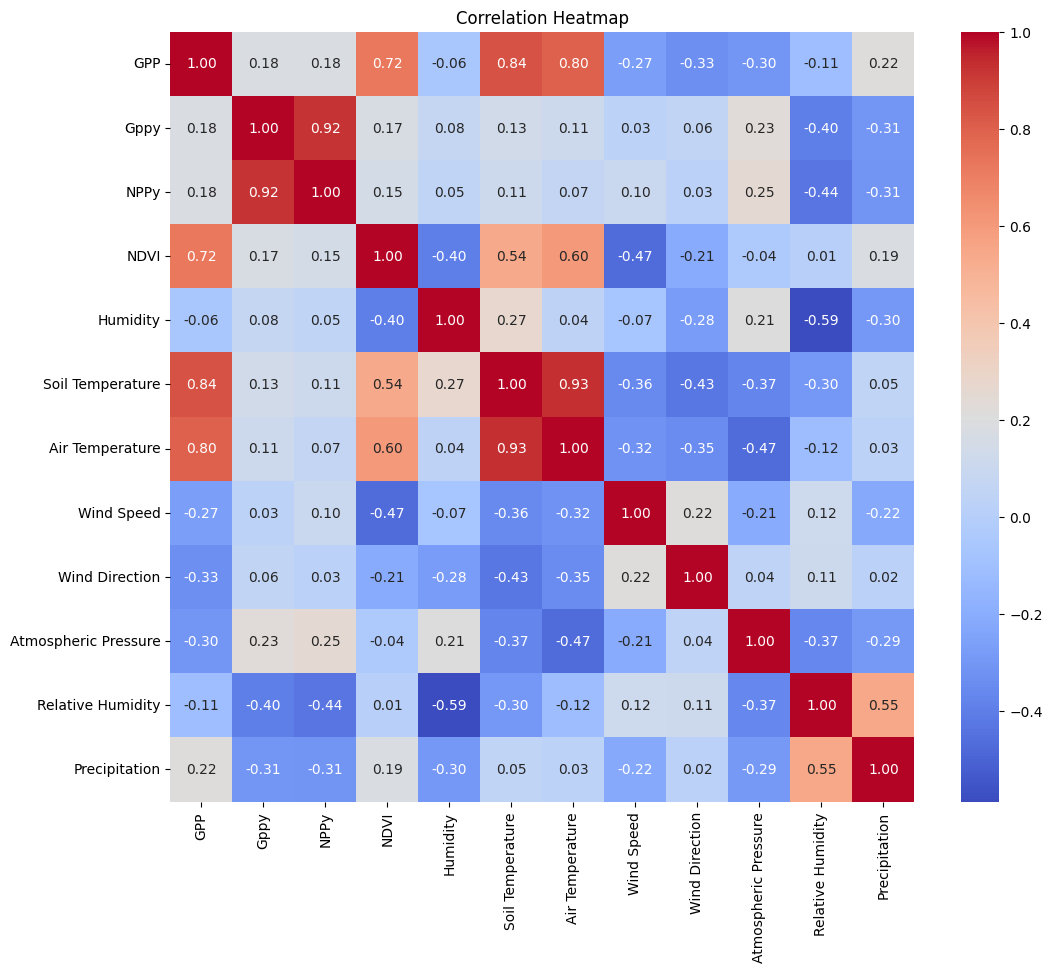

In [ ]:
# Select the columns for correlation analysis
columns_for_correlation = ['GPP','Gppy', 'NPPy', 'NDVI', 'Humidity','Soil Temperature','Air Temperature'
                             ,'Wind Speed','Wind Direction','Atmospheric Pressure','Relative Humidity','Precipitation']

# Calculate the correlation matrix
correlation_matrix = final_data[columns_for_correlation].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Find pairs of features with correlation greater than 0.85
for i in range(len(correlation_matrix.columns)):
  for j in range(i + 1, len(correlation_matrix.columns)):
    if abs(correlation_matrix.iloc[i, j]) > 0.80:
      print(f'{correlation_matrix.columns[i]} and {correlation_matrix.columns[j]} have a correlation of {correlation_matrix.iloc[i, j]:.2f}')

GPP and Soil Temperature have a correlation of 0.84
Gppy and NPPy have a correlation of 0.92
Soil Temperature and Air Temperature have a correlation of 0.93


Since pairs such as (Gppy, Nppy) and (Soil Temperature, Air Temperature) have a high correlation we will drop Gppy and Air temperature.

In [ ]:
final_data.drop(columns=['Gppy','Air Temperature'], inplace= True)

In [ ]:
final_data.head()

,Date,latitude,longitude,.geo,GPP,NDVI,NPPy,Npp,Humidity,Soil Temperature,Wind Speed,Wind Direction,Atmospheric Pressure,Relative Humidity,Precipitation
0,2016-06-08,39.229653,-92.151652,"{""type"":""Point"",""coordinates"":[-92.15165221201...",0.1965,0.831498,1.2198,0.100600,98.348723,30.958737,2.371555,166.95485,98.39378,42.661617,0.0
1,2016-06-08,39.229653,-92.151383,"{""type"":""Point"",""coordinates"":[-92.15138271742...",0.1934,0.762162,1.1292,0.101817,98.348723,30.958737,2.371555,166.95485,98.39378,42.661617,0.0
2,2016-06-08,39.229653,-92.151113,"{""type"":""Point"",""coordinates"":[-92.15111322284...",0.1949,0.621207,1.0441,0.103755,98.348723,30.958737,2.371555,166.95485,98.39378,42.661617,0.0
3,2016-06-08,39.229653,-92.150844,"{""type"":""Point"",""coordinates"":[-92.15084372825...",0.1971,0.700160,0.9601,0.104787,98.348723,30.958737,2.371555,166.95485,98.39378,42.661617,0.0
4,2016-06-08,39.229653,-92.150574,"{""type"":""Point"",""coordinates"":[-92.15057423367...",0.1976,0.704429,0.9310,0.104431,98.348723,30.958737,2.371555,166.95485,98.39378,42.661617,0.0


In [ ]:
final_data.shape

(11230, 15)

In [ ]:
final_data.to_csv('/content/drive/Shareddrives/DATA298B/Landsat_Data/Missouri/Data_Mis_BAU/Final_merged_data.csv', index=False)